# Trabalho Metodo dos Trapézios Repetidos e Simpsons
Feito por:
- Guilherme Vasconcellos Sobreira de Carvalho - 124024302
- Yuri Altomare de Carvalho - 122145071

Valor da integral da função de 0 a 10: -125.0


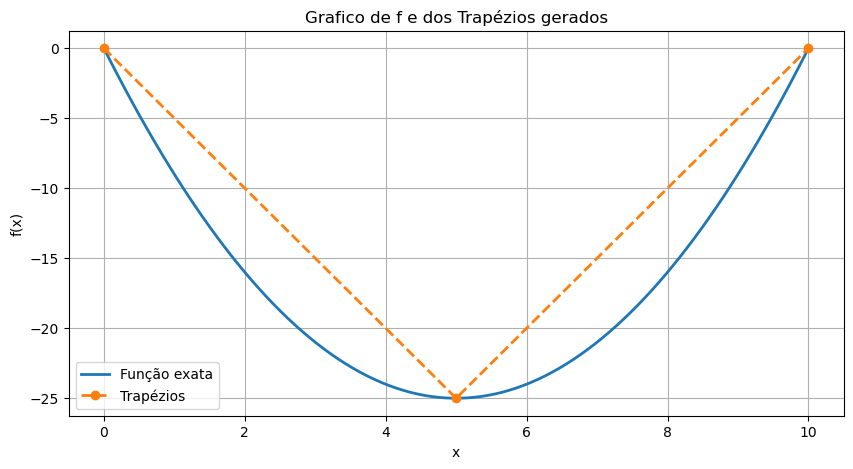

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def mtr(f, a, b, n):
    h = (b - a)/n

    xs = np.linspace(a, b, n+1)
    fs = f(xs)

    res = (h/2) * (fs[0] + 2 * np.sum(fs[1:-1]) + fs[-1])

    return xs, res, fs

def main():
    funcao = lambda x: x*(x-10)
    a, b = 0, 10
    num = 2

    x_funcao_exata = np.linspace(0, 10, 100)
    xs, res, fs = mtr(funcao, a, b, num)

    funcao_exata = funcao(x_funcao_exata)

    print(f"Valor da integral da função de 0 a 10: {res}")
    plt.figure(figsize=(10, 5))

    plt.plot(x_funcao_exata, funcao_exata, label="Função exata", linewidth=2)
    plt.plot(xs, fs, "o--",label="Trapézios", linewidth=2)
    plt.xlabel("x") 
    plt.ylabel("f(x)")
    plt.title("Grafico de f e dos Trapézios gerados")
    plt.legend()
    plt.grid()
    plt.show()


main()

Número de intervalos: 2
Valor da integral (Simpson): -166.66666666666669


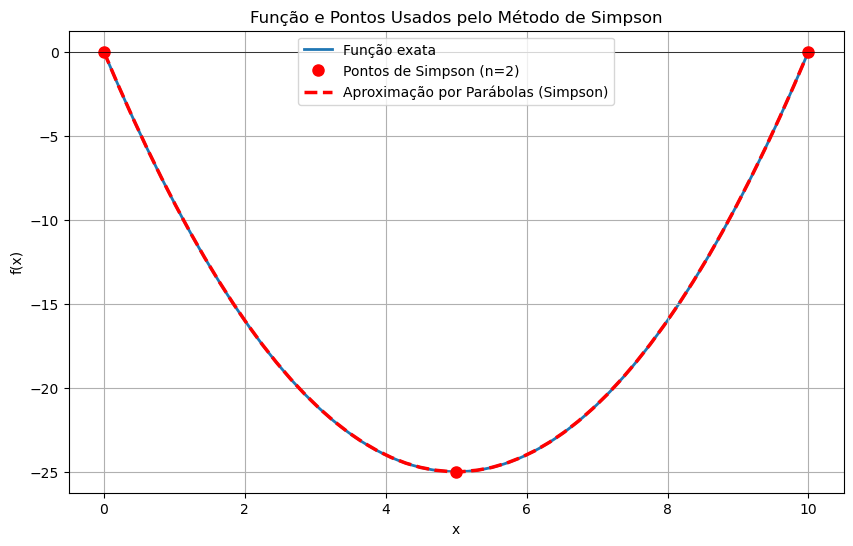

In [11]:
def simpson(f, a, b, n):
    if n % 2 != 0:
        print(f"n precisa ser par")
        return 
    
    xs = np.linspace(a, b, n+1)
    h = (b-a)/n
    fs = f(xs)

    res = (h/3) * (fs[0] + 4*np.sum(fs[1:-1:2]) + 2*np.sum(fs[2:-1:2]) + fs[-1])

    return xs, res, fs

def main():
    funcao = lambda x: x*(x-10)
    a, b = 0, 10
    num_intervalos = 2

    xs_simpson, res_simpson, fs_simpson = simpson(funcao, a, b, num_intervalos)
    
    print(f"Número de intervalos: {num_intervalos}")
    print(f"Valor da integral (Simpson): {res_simpson}")

    x_funcao_exata = np.linspace(a, b, 200)
    y_funcao_exata = funcao(x_funcao_exata)

    plt.figure(figsize=(10, 6))
    plt.plot(x_funcao_exata, y_funcao_exata, label="Função exata", linewidth=2, zorder=1)
    
    
    plt.plot(xs_simpson, fs_simpson, 'o', color='red', markersize=8, label=f"Pontos de Simpson (n={num_intervalos})", zorder=2)

    # vamos desenhar as parabolas
    for i in range(0, num_intervalos, 2):
        x_seg = xs_simpson[i:i+3]
        y_seg = fs_simpson[i:i+3]

        A = np.vander(x_seg, 3)

        coefs_parabola = np.linalg.solve(A, y_seg)

        x_parabola = np.linspace(x_seg[0], x_seg[2], 50)
        y_parabola = coefs_parabola[0]*x_parabola**2 + coefs_parabola[1]*x_parabola + coefs_parabola[2]

        label = "Aproximação por Parábolas (Simpson)" if i == 0 else ""
        plt.plot(x_parabola, y_parabola, color='red', linestyle='--', linewidth=2.5, zorder=2, label=label)

    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.title("Função e Pontos Usados pelo Método de Simpson")
    plt.legend()
    plt.grid(True)
    plt.axhline(0, color='black', linewidth=0.5) 
    plt.show()


main()

In [7]:
funcao = lambda x: x*(x-10)
a, b = 0, 10
num_intervalos = 2
_, res_simpson, _ = simpson(funcao, a, b, num_intervalos)
_, res_trapezio, _ = mtr(funcao, a, b, num_intervalos)

valor_exato_integral = (10**3 / 3 - 5 * 10**2) - (0) 

erro_simpson = abs(res_simpson - valor_exato_integral)
erro_percentual_simpson = erro_simpson / valor_exato_integral

erro_trapezio = abs(res_trapezio - valor_exato_integral)
erro_percentual_trapezio = erro_trapezio / valor_exato_integral

print(f"O erro do método de simpson é de {erro_simpson:.15f}. Erro percentual: {erro_percentual_simpson:.2f}%")
print(f"O erro do método do trapézio é de {erro_trapezio:.15f}. Erro percentual: {erro_percentual_trapezio:.2f}%")

O erro do método de simpson é de 0.000000000000000. Erro percentual: -0.00%
O erro do método do trapézio é de 41.666666666666686. Erro percentual: -0.25%


# Comparação dos resultados
É possível reparar que, separando o intervalo em apenas 2 segmentos, a resposta do método de Simpson convergiu para a resposta enquanto que a do método dos trapézios não obteve o mesmo exito, ou seja, caso discretizamos mais ainda o intervalo, conseguiremos extrair uma resposta mais precisa do Método de Simpson do que o Método dos Trapézios Repetidos